In [99]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup

def get_course_list(dept, semester, division, clickable=True):
    
    url = f"http://www.buffalo.edu/class-schedule?switch=showcourses&semester={semester}&division={division}&dept={dept}"
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    tables = soup.find_all("table")
    course_table = tables[5]
    rows = course_table.find_all("tr")
    headers_row = rows[3]
    headers = []
    for t in headers_row.find_all("td"):
        headers.append(t.text.strip())
    headers.append("Link")
        
    course_list = []
    for i in range(4, len(rows)):
        c = []
        td = rows[i].find_all("td")
        if "Class" in td[0].text:
            continue
        for t in td:
            links = (t.find_all("a"))
            if len(links):
                link = links[0].get("href")
            c.append(re.sub(" +", " ", t.text.strip()))
        c.append(link)
        course_list.append(c)
    
    df = pd.DataFrame.from_records(course_list, columns=headers)
    
    return df


def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">link</a>'.format(val, val)

In [101]:
df = get_course_list(dept="MTH", semester="fall", division="2")
df.style.format({'Link': make_clickable})

In [88]:
def get_enrollement(url, c=0, e=2, s=4):
    p = requests.get(url).text
    soup = BeautifulSoup(p)
    tables = soup.find_all("table")
    t = tables[5]
    info = t.find_all("td", {"class":"info"})
    capacity = info[c].text.strip()
    enrollment_tot = (info[e].text.strip())
    seats_available = (info[s].text.strip())
    return capacity, enrollment_tot, seats_available

In [94]:
url = "http://www.buffalo.edu/class-schedule?switch=showclass&semester=winter&division=UGRD&dept=MTH&regnum=10231"

get_enrollement(url, c=0, e=2, s=4)

('150', '0', '150')

In [85]:
df["Capacity"], df["Enrollment"], df["Seats Available"] = df["Link"].map(get_enrollement)

ValueError: too many values to unpack (expected 3)

In [92]:
url = "http://www.buffalo.edu/class-schedule?switch=showclass&semester=winter&division=UGRD&dept=MTH&regnum=10132"

get_enrollement(url, c=1, e=3, s=5)

('150', '0', '150')

In [95]:
url = "http://www.buffalo.edu/class-schedule?switch=showclass&semester=winter&division=UGRD&dept=MTH&regnum=10416"
get_enrollement(url, c=1, e=3, s=5)

('45', '0', '45')

In [ ]:
def get_enrollement(url, c=0, e=2, s=4):
    p = requests.get(url).text
    soup = BeautifulSoup(p)
    tables = soup.find_all("table")
    t = tables[5]
    for r in 
    info = t.find_all("td", {"class":"info"})
    capacity = info[c].text.strip()
    enrollment_tot = (info[e].text.strip())
    seats_available = (info[s].text.strip())
    return capacity, enrollment_tot, seats_available

In [97]:
x = 12

s = f"the number is {x}"
print(s)

the number is 12


In [105]:
url = "http://www.buffalo.edu/class-schedule?switch=showclass&semester=winter&division=UGRD&dept=MTH&regnum=10132"
c=0
e=2
s=4

p = requests.get(url).text
soup = BeautifulSoup(p)
tables = soup.find_all("table")
t = tables[5]
info = t.find_all("td", {"class":"info"})
capacity = info[c].text.strip()
enrollment_tot = (info[e].text.strip())
seats_available = (info[s].text.strip())
print(capacity, enrollment_tot, seats_available)

10132 P1 4.00                              credits


## SVG

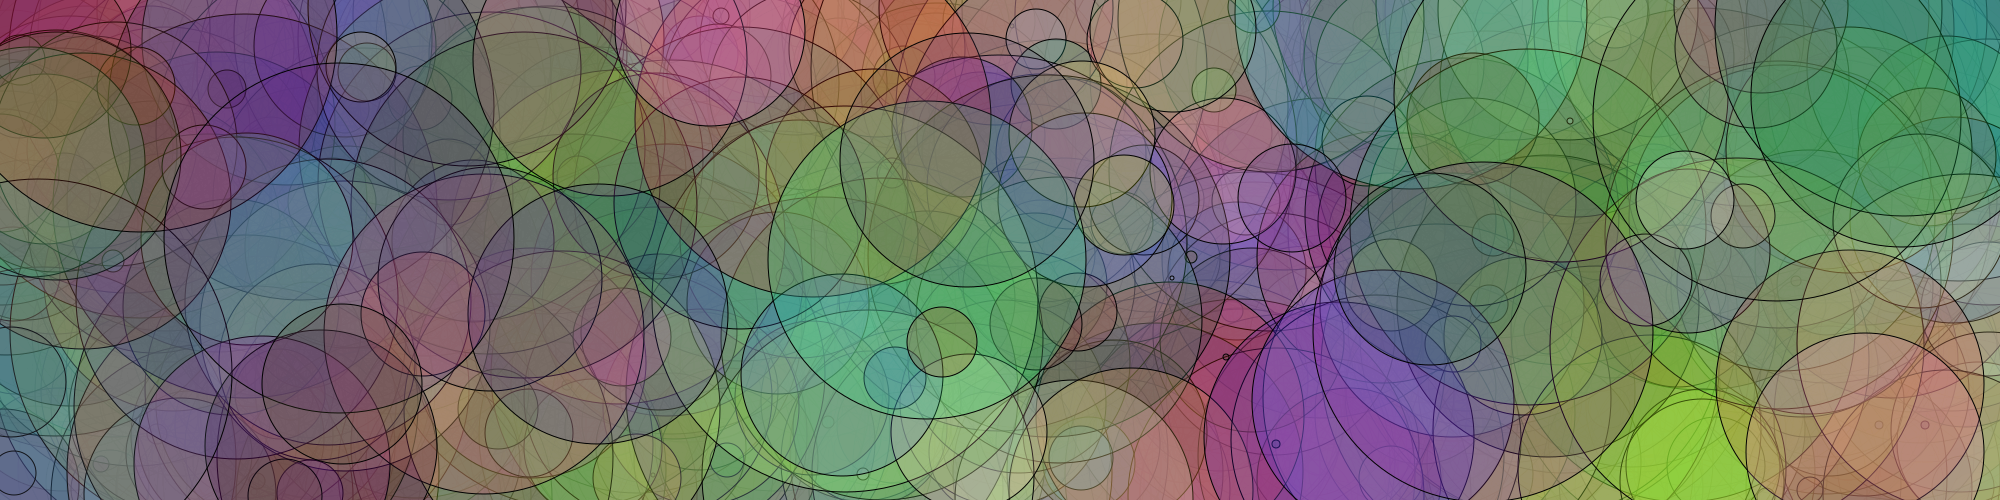

In [19]:
import numpy as np
R, G, B  = np.random.randint(0, 256, 3)
cx, cy, r =  np.random.randint(0, 100, 3)

circles = []


for i in range(2000):
    R, G, B  = np.random.randint(0, 256, 3)
    cx = np.random.randint(0, 2000)
    cy = np.random.randint(0, 500)
    r = np.random.randint(1, 200)
    
    s =  f'<circle cx="{cx}" cy="{cy}" r="{r}" stroke="black" stroke-width="1" fill-opacity="0.2" fill="#{R:02x}{G:02x}{B:02x}" />'
    circles.append(s)
    

pre = """
<svg
   xmlns="http://www.w3.org/2000/svg"
   width="2000" height="500">""" 

post = "</svg>"

svg = pre + "\n" + "\n".join(circles) + "\n" + post

with open("circles.svg", 'w') as foo:
    foo.write(svg)
    
from IPython.display import SVG
SVG(svg)

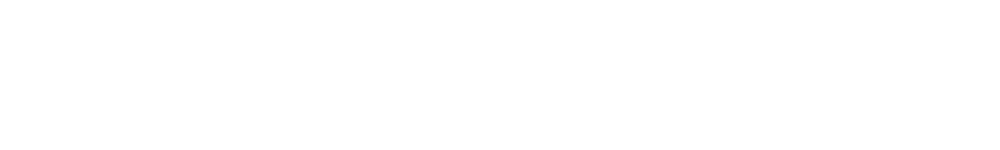

In [1]:
from IPython.display import SVG, display, clear_output
from time import sleep

def animate_svg(frames, delay=0.01):
    for frame in frames:
        display(SVG(frame))
        sleep(0.01)
        clear_output(wait=True)
        
        
s = '''<svg
   xmlns="http://www.w3.org/2000/svg"
   width="1000" height="150">
  <circle cx="{}" cy="50" r="40" stroke="gray" stroke-width="8" fill="#77cc77" />
</svg>'''


def circle(n):
    for i in range(n):
        yield s.format(i*3)
i=0
while True:
    x = circle(360)
    animate_svg(x)
    i += 1
    if i >3:
        break

In [41]:
from IPython.display import SVG, display, clear_output
import numpy as np
import requests
from lxml import etree
url = "http://blue.math.buffalo.edu/448/USA_Counties_with_FIPS_and_names.svg"
tree = etree.fromstring(requests.get(url).text.encode('utf8'))
t = tree[0]
i = 0
for p in t:
    c = np.random.randint(2,255) 
    p.set("fill", f"#ff{c:02x}{c:02x}")
    display(SVG(etree.tostring(tree)))
    sleep(0.01)
    clear_output(wait=True)
    i += 1
    if i > 1000: break

KeyboardInterrupt: 

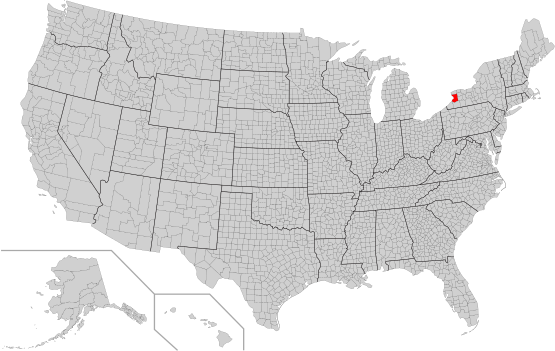

In [5]:
with open('USA_Counties_with_FIPS_and_names.svg', 'r') as foo:
    s = foo.read().encode("utf8")
SVG(s)

In [37]:
from lxml import etree
import numpy as np
with open('USA_Counties_with_FIPS_and_names.svg') as f:
            map = etree.fromstring(f.read().encode('utf-8'))
item = map[0] # second g is State lines and separators
print(item.tag,len(item))
for i,path in enumerate(item):
    print(path.attrib.keys())
    if i>5: break

{http://www.w3.org/2000/svg}g 3141
['id', 'd']
['id', 'd']
['id', 'd']
['id', 'd']
['id', 'd']
['id', 'd']
['id', 'd']


In [11]:
map[0].items()

[('id', 'stylegroup'),
 ('fill', '#d0d0d0'),
 ('stroke', '#000'),
 ('stroke-width', '.1')]

In [12]:
map[1].items()

[('id', 'g6288'), ('fill', 'none')]

In [38]:
counties = map[0]

In [15]:
counties[0].items()

[('id', 'FIPS_02185'),
 ('d',
  'm62.678 259.31.882-.881.66-.44.219.44-.439.22h.439l2.204-.66 1.983-2.425 1.762.882v.442l-.661.659v.663l.661-.221.441-1.101.44-.442.661.66.22.883.661.221.219-.441 1.101-.222h1.763l.219.222-.44.66v.22l1.323.221-.222.66h.882l1.101-.66 2.423-.221 1.542.441h.664l.658.22.223.22h.881l1.101-.22h1.323l1.542.442.44-.222.882-.66.219-.221.441-.439 1.543.219 3.524 1.101 1.101 3.526.661 2.203-9.032 2.203.441 2.422-1.762.441-4.627.884h-.223l-10.351 1.1h-2.424v-.441h-1.761v-.441h-1.763l-1.762.22h-1.323v-.438h-.66v.218h-1.982l-.441-.218h-.221v.218h-.88l-.222-.44h-1.101v.44h-.442l-3.085-.218v.878h-1.542l-1.321-.66-.661-.882.44-1.32.221-1.544 1.542.222 1.984-.222.659-.219 1.322-1.543.663-1.982 1.321-1.982.882-.883.66.223.882-.442z')]

In [16]:
len(map[1])

2

In [31]:
map[1][1].attrib["stroke"] =  "#ffff00"

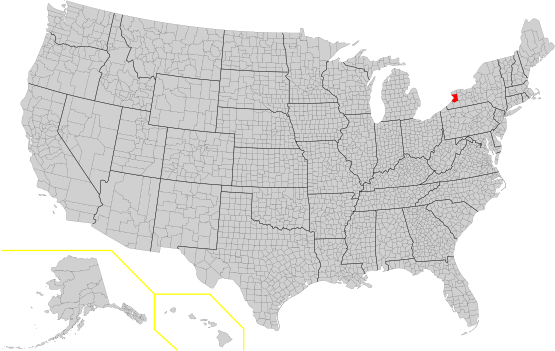

In [32]:
 display(SVG(etree.tostring(map)))

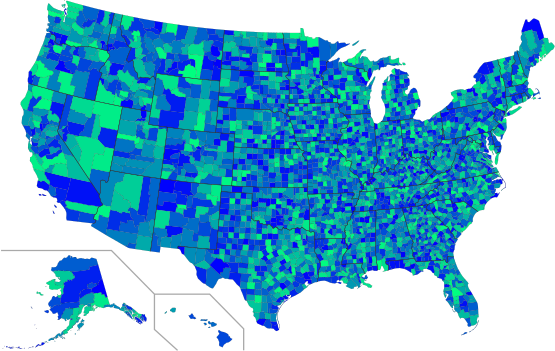

In [102]:
import matplotlib.cm as cm

for m in dir(cm):
    try:
        cmap = getattr(cm, m)
        for c in counties:
            t = np.random.random()
            R,G,B,_ = [int(255*x) for x in cmap(t)] 
            c.attrib["fill"] = f"#{R:02x}{G:02x}{B:02x}"
            c.attrib["fill-opacity"] = "1"
        display(SVG(etree.tostring(map)))
    except:
        continue
    sleep(0.5)
    clear_output(wait=True)

In [16]:
from IPython.display import display, SVG
import numpy as np
from lxml import etree
import requests

def add_scale(colors, labels, font_size=6, save_file=None):
    '''
    :colors: 
             A list of colors in the hex format
    :labels: 
             A list of strings with scale labels. 
             Note: if there are N colors, then N+1 labels are needed.
    :font_size:
             The size of labels font.
    :save_file:
             The name of the file where the map with the scale should be 
             saved. If None, the file will not be saved
    
    Returns:
             A string with the map with the scale added. 
    '''

    def set_props(elt, d):
        '''
        Utility function for assigning attributes to SVG elements
        from a dictionary.
        '''
        for k, v in d.items():
            getattr(elt, "set")(k, v)
            
    # coordinates of the upper left corner of the scale
    scale_x = 515
    scale_y = 180
    # scale dimensions
    scale_height = 150
    scale_width = 10
    # x-coordinates of scale labels
    label_x = 528
    
    N = len(colors)
    h = scale_height/N
    
    url = "http://blue.math.buffalo.edu/448/USA_Counties_with_FIPS_and_names.svg"
    svg_map_text = requests.get(url).text
    svg_map = etree.fromstring(svg_map_text.encode('utf-8'))
    
    # attributes of scale rectangles
    rect_props = {"x": f"{scale_x}", 
                  "width": f"{scale_width}",
                  "height": f"{h}",
                  "stroke": "black", 
                  "stroke-width": "0.25"}
    
    # attributes of scale labels
    label_props = {"x": f"{label_x}", 
                   "text-anchor": "start", 
                   "dominant-baseline": "central",
                   "font-size": f"{font_size}", 
                   "font-family": "sans-serif"}
    
    # create group element for the scale
    scale = etree.SubElement(svg_map, "g")
    scale.set("id", "color_scale")

    # create scale rectabgles and labels
    for i in range(N):
        rect_y = f"{scale_y + scale_height -(i+1)*h}"
        label_y = f"{scale_y + scale_height - i*h}"
        
        rect_props["id"] = f"scale_rect_{i}"
        rect_props["y"] = rect_y
        rect_props["fill"] = colors[i]
        rect = etree.SubElement(scale, "rect")
        set_props(rect, rect_props)

        label =  etree.SubElement(scale, "text")
        label_props["id"] = f"scale_label_{i}"
        label_props["y"] = label_y
        set_props(label, label_props)
        label.text = labels[i]
    
    #  create the top label
    label_y = f"{scale_y}"
    label =  etree.SubElement(scale, "text")
    label_props["y"] = rect_y 
    set_props(label, label_props)
    label.text = labels[-1]
    
    new_map = etree.tostring(svg_map).decode("utf8")
    
    if save_file is not None:
        with open(save_file, "w") as foo:
            foo.write(new_map) 
    
    return new_map
    
def get_colors(cmap, N):
    '''
    Creates a list of length N of hex color codes 
    obtained from a given color map. 
    '''
    rgb_colors = [(255*np.array(cmap(t))[:3]).astype(int) for t in np.linspace(0, 1, N)]
    hex_colors = ["#{:02x}{:02x}{:02x}".format(*c) for c in rgb_colors]
    return hex_colors

27.4


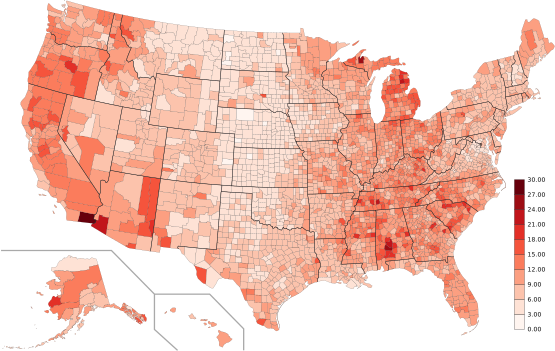

In [70]:
from lxml import etree
import matplotlib.cm as cm
import numpy as np
import bisect
import pandas as pd

cmap = cm.Reds
N = 10
MAX = 30


def get_color(value, breakpoints, colors):
    i = bisect.bisect(breakpoints, value)
    return colors[i-1]

df = pd.read_excel("laucnty09.xlsx", skiprows=[0, 1, 2,4], converters={1:str, 2:str})
df["FULL_FIPS"] = df["FIPS"] + df["FIPS.1"]
print(df["Unemployment Rate"].max())
breakpoints = np.linspace(0, MAX, N+1)
labels = [f"{x:.2f}" for x in breakpoints]
colors = get_colors(cmap, N)


df["Color"] = df["Unemployment Rate"].map(lambda x: get_color(x, breakpoints, colors))
map_svg = etree.fromstring(add_scale(colors, labels, font_size=6, save_file=None))
counties = map_svg[0]

for c in counties:
    FIPS = c.get("id").split("_")[1]
    try:
        iloc = df.loc[df['FULL_FIPS']== FIPS].index[0]
        color = df.iloc[iloc]["Color"]
    except:
        color = "#888888"
    c.set("fill", color)
    
s = etree.tostring(map_svg).decode("utf8")
with open("unemployment_2009.svg", 'w') as foo:
    foo.write(s)
SVG(s)

In [18]:
import ipywidgets as widgets
from IPython.display import SVG, display, clear_output
from ipywidgets.embed import embed_minimal_html
maps = {}
for y in range(2000, 2019):
    with open(f"unemployment_{y}.svg") as foo:
        maps[y] = SVG(foo.read().encode("utf8"))

slider  = widgets.IntSlider(
    value=2000,
    min=2000,
    max=2018,
    step=1,
    description='Year:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=widgets.Layout(width='600px')
)
output2 = widgets.Output()
with output2:
        display(maps[2000])
        
def on_value_change(change):
    with output2:
        clear_output(wait=True)
        display(maps[change["new"]])

slider.observe(on_value_change, names='value')

widgets.VBox([output2, slider])

VBox(children=(Output(), IntSlider(value=2000, description='Year:', layout=Layout(width='600px'), max=2018, min=2000)))

In [20]:
import ipywidgets as widgets
from IPython.display import SVG, display, clear_output
from ipywidgets.embed import embed_minimal_html


s = '''<svg
   xmlns="http://www.w3.org/2000/svg"
   width="1000" height="150">
  <circle cx="{}" cy="50" r="40" stroke="gray" stroke-width="8" fill="#77cc77" />
</svg>'''

slider  = widgets.IntSlider(
    value=100,
    min=100,
    max=400,
    step=20,
    description='Year:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=widgets.Layout(width='600px')
)
output2 = widgets.Output()
with output2:
        display(SVG(s.format(100)))


def on_value_change(change):
    with output2:
        clear_output(wait=True)
        display(SVG(s.format(change["new"])))

slider.observe(on_value_change, 'value')

widgets.VBox([output2, slider])

VBox(children=(Output(), IntSlider(value=100, description='Year:', layout=Layout(width='600px'), max=400, min=100, step=20)))